# Image Classification using transfer learning


https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [1]:
import tensorflow as tf

## Accessing data

In [2]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-02-22 07:05:53--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.63.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   194MB/s    in 0.3s    

2023-02-22 07:05:53 (194 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]





```
# This is formatted as code
```



In [4]:
import zipfile

In [5]:
zip_ref=zipfile.ZipFile('cats_and_dogs_filtered.zip')

In [6]:
## Extract
zip_ref.extractall()

In [7]:
zip_ref.close()

## Preprocessing

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# Creating directories

train_dir="cats_and_dogs_filtered/train"

validation_dir="cats_and_dogs_filtered/validation"

In [10]:
# Object of the class

train_datagen=ImageDataGenerator(rescale=1/255)

validation_datagen=ImageDataGenerator(rescale=1/255)

In [11]:
# Preprocessing
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150))

Found 2000 images belonging to 2 classes.


In [12]:
validation_generator=validation_datagen.flow_from_directory(validation_dir,target_size=(150,150))

Found 1000 images belonging to 2 classes.


## Model building

### Standard own model

In [13]:
model_1=tf.keras.Sequential()
model_1.add(tf.keras.layers.Conv2D(filters=64,
                                   kernel_size=(3,3),
                                   activation='relu',
                                   input_shape=(150,150,3)))

model_1.add(tf.keras.layers.Conv2D(filters=64,
                                   kernel_size=(3,3),
                                   activation='relu',
                                   ))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model_1.add(tf.keras.layers.Conv2D(filters=128,
                                   kernel_size=(3,3),
                                   activation='relu',
                                   ))
model_1.add(tf.keras.layers.Conv2D(filters=128,
                                   kernel_size=(3,3),
                                   activation='relu',
                                   ))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model_1.add(tf.keras.layers.Conv2D(filters=256,
                                   kernel_size=(3,3),
                                   activation='relu',
                                   ))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model_1.add(tf.keras.layers.Flatten())

model_1.add(tf.keras.layers.Dense(50, activation='relu'))
model_1.add(tf.keras.layers.Dense(2,activation='softmax'))

In [14]:
# Compiling
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# Train

model_1.fit(train_generator,epochs=2, validation_data=validation_generator)

## Model building with pre-trained model

### Accessing the ResNet50

In [15]:
from tensorflow.keras.applications.resnet import ResNet50

In [16]:
model_2=ResNet50()

102967424/102967424 [==============================] - 1s 0us/step


In [17]:
model_2.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

### Transfer learning model

In [19]:
model_3=tf.keras.Sequential()
model_3.add(ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3)))
model_3.add(tf.keras.layers.GlobalMaxPool2D())
model_3.add(tf.keras.layers.Dense(50,activation='relu'))
model_3.add(tf.keras.layers.Dense(2,activation='softmax'))

94765736/94765736 [==============================] - 0s 0us/step


In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense_2 (Dense)             (None, 50)                102450    
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 23,690,264
Trainable params: 23,637,144
Non-trainable params: 53,120
_________________________________________________________________


In [21]:
model_3=tf.keras.Sequential()
model_3.add(ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3)))
model_3.add(tf.keras.layers.GlobalMaxPool2D())
model_3.add(tf.keras.layers.Dense(50,activation='relu'))
model_3.add(tf.keras.layers.Dense(2,activation='softmax'))
model_3.layers[0].trainable=False


In [22]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d_1 (Glo  (None, 2048)             0         
 balMaxPooling2D)                                                
                                                                 
 dense_4 (Dense)             (None, 50)                102450    
                                                                 
 dense_5 (Dense)             (None, 2)                 102       
                                                                 
Total params: 23,690,264
Trainable params: 102,552
Non-trainable params: 23,587,712
_________________________________________________________________


In [24]:
# Compiling
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

Epoch 1/2
63/63 [==============================] - 251s 4s/step - loss: 0.7315 - accuracy: 0.5250 - val_loss: 0.6730 - val_accuracy: 0.5810
Epoch 2/2
63/63 [==============================] - 243s 4s/step - loss: 0.6635 - accuracy: 0.6000 - val_loss: 0.6674 - val_accuracy: 0.5860


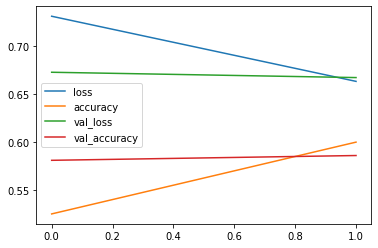

In [25]:
# Training
tf.random.set_seed(100)
import pandas as pd
hist=model_3.fit(train_generator,epochs=2,validation_data=validation_generator)
pd.DataFrame(hist.history).plot();